<a href="https://colab.research.google.com/github/Le0-Pa1va/pytorch-class/blob/main/5_Pytorch_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(46)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

-2.8


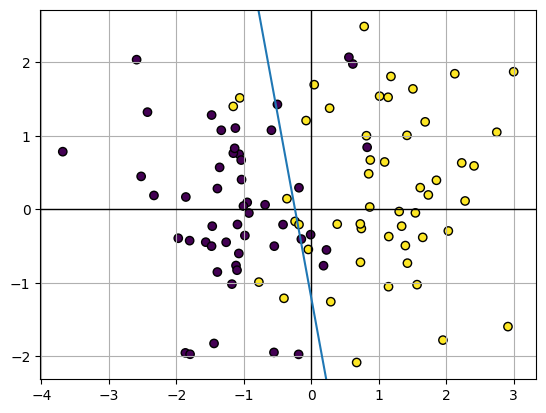

In [ ]:
def plotmodel(w1, w2, b):
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k')
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
# Cria um vetor que começa em -2, termina em 4 e possui 50 valores nesse intervalo
  x = np.linspace(-2, 4, 50)
  y = (-w1*x - b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
b = 1.2

plotmodel(w1, w2, b)

# pegando um ponto da classe azul e calculando a equação da reta para verificar se ele é um ponto positivo ou negativo
# com isso, descobrimos que os pontos azuis são negativos e os amarelos são positivos

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [ ]:
# NESSE CASO o Perceptron tem 2 entradas (x1 e x2) e uma saída (o número impresso da equação da reta)
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[0.2535, 0.1644]])
tensor([-0.4911])
tensor([[5., 1.]])
tensor([1.2000])


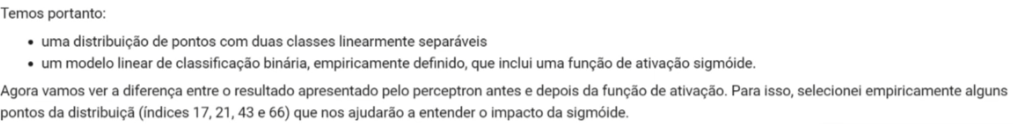

tensor([-3.6835,  0.7848])
tensor([-0.1461, -0.4050])
tensor([-0.5009,  1.4280])
tensor([3.0020, 1.8728])


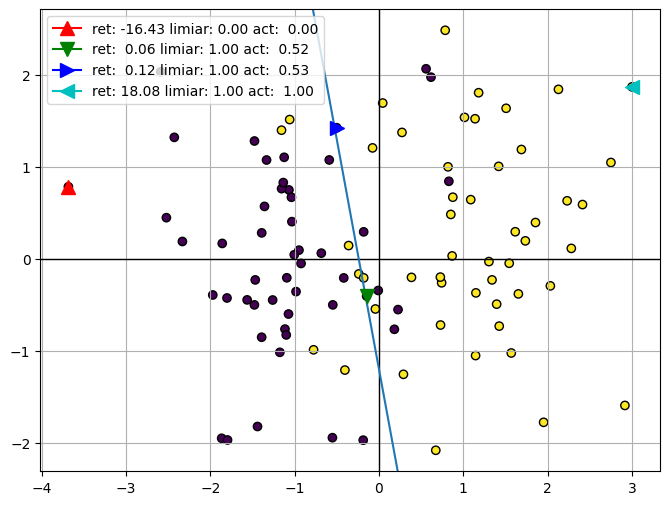

In [ ]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'c']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  print(x)
  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1
  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])

  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
plt.legend()
plt.show()